In [ ]:
# customer churn meaning is that if the customer left the company or organization and stop the services after some time

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
data=pd.read_csv(r"C:\Users\praya\Downloads\Telco-Customer-Churn.csv")

In [29]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
data.shape

(7043, 21)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [36]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [38]:
data['TotalCharges']=data['TotalCharges'].replace(" ","0")
data['TotalCharges']=data['TotalCharges'].astype('float')

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [42]:
# to find out null values in whole dataset
data.isnull().sum().sum()

0

In [44]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [46]:
data.duplicated().sum()

0

In [48]:
data['customerID'].duplicated().sum()

0

In [50]:
def conversion(value):
    if value==1:
        return 'yes'
    else:
        return 'no'
data['SeniorCitizen']=data['SeniorCitizen'].apply(conversion)

In [52]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


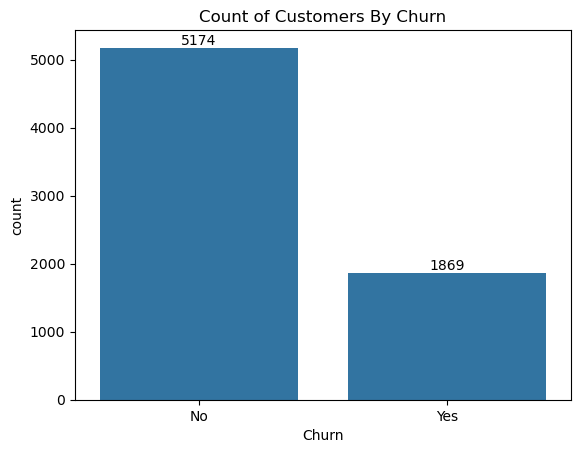

In [55]:
ax=sns.countplot(x=data['Churn'],data=data)
plt.title('Count of Customers By Churn')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

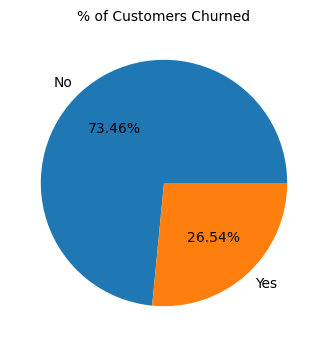

In [56]:
plt.figure(figsize=(6,4))
gb=data.groupby('Churn').agg({'Churn':'count'})
plt.title('% of Customers Churned',fontsize=10)
plt.pie(gb['Churn'],autopct='%1.2f%%',labels=gb.index)
plt.show()

# FROM THE GIVEN PIE CHART 26.54% OF OUR CUSTOMERS HAVE CHURNED OUT
# NOW LETS EXPLORE THE RESON BEHIND IT

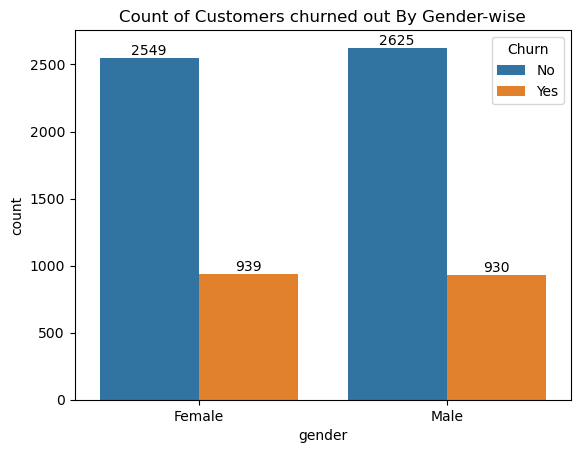

In [60]:
ax=sns.countplot(x=data['gender'],data=data,hue='Churn')
plt.title('Count of Customers churned out By Gender-wise')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

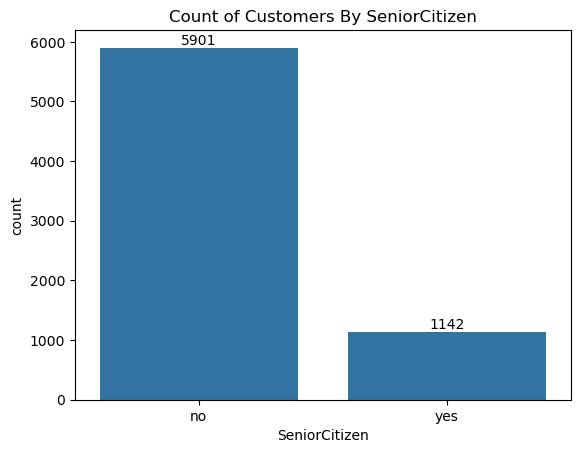

In [61]:
ax=sns.countplot(x=data['SeniorCitizen'],data=data)
plt.title('Count of Customers By SeniorCitizen')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

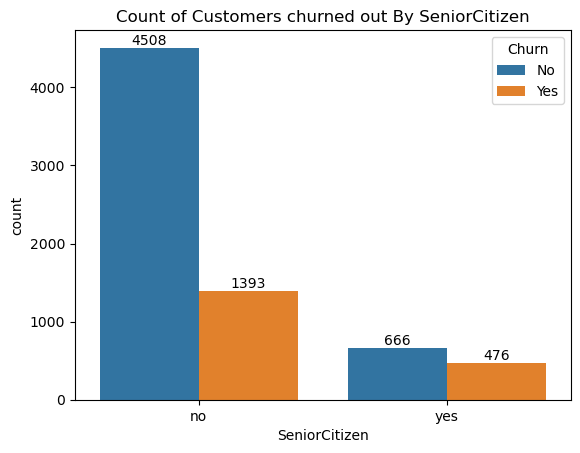

In [62]:
ax=sns.countplot(x=data['SeniorCitizen'],data=data,hue='Churn')
plt.title('Count of Customers churned out By SeniorCitizen')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# comparative a greater % of people in senior citizen category have churned out (around 41%).

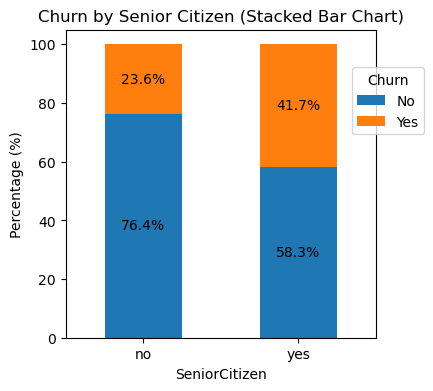

In [67]:
total_counts = data.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack() * 100

# Plot
fig, ax = plt.subplots(figsize=(4, 4))  # Adjust figsize for better visualization

# Plot the bars
total_counts.plot(kind='bar', stacked=True, ax=ax, color=['#1f77b4', '#ff7f0e'])  # Customize colors if desired

# Add percentage labels on the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.text(x + width / 2, y + height / 2, f'{height:.1f}%', ha='center', va='center')

plt.title('Churn by Senior Citizen (Stacked Bar Chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)
plt.legend(title='Churn', bbox_to_anchor = (0.9,0.9))  # Customize legend location

plt.show()

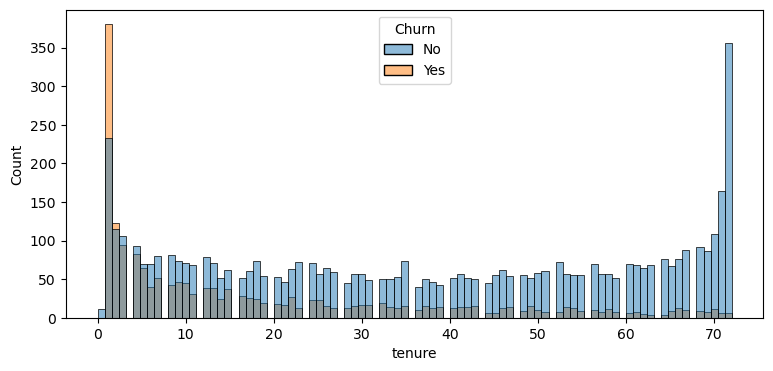

In [68]:
plt.figure(figsize=(9,4))
sns.histplot(x='tenure',data=data,bins=90,hue='Churn')
plt.show()

# people who have used our services for a long time have stayed and people who have used our services # 
# 1 or 2 months have churned.

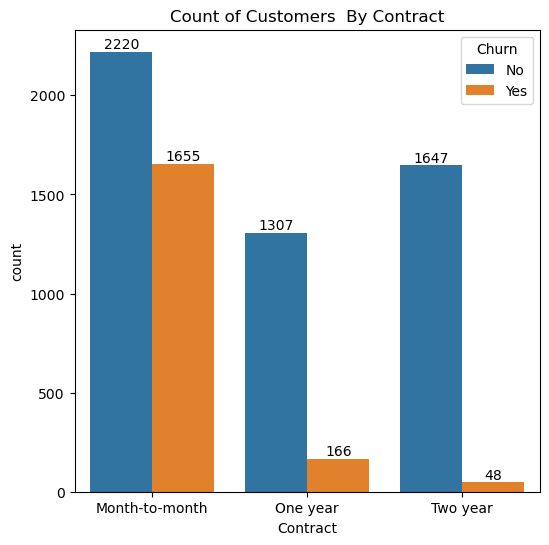

In [71]:
plt.figure(figsize=(6,6))
ax=sns.countplot(x=data['Contract'],data=data,hue="Churn")
plt.title('Count of Customers  By Contract')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# people who have monthly contract are likely to churn then those who have 1 or 2 years of contract.

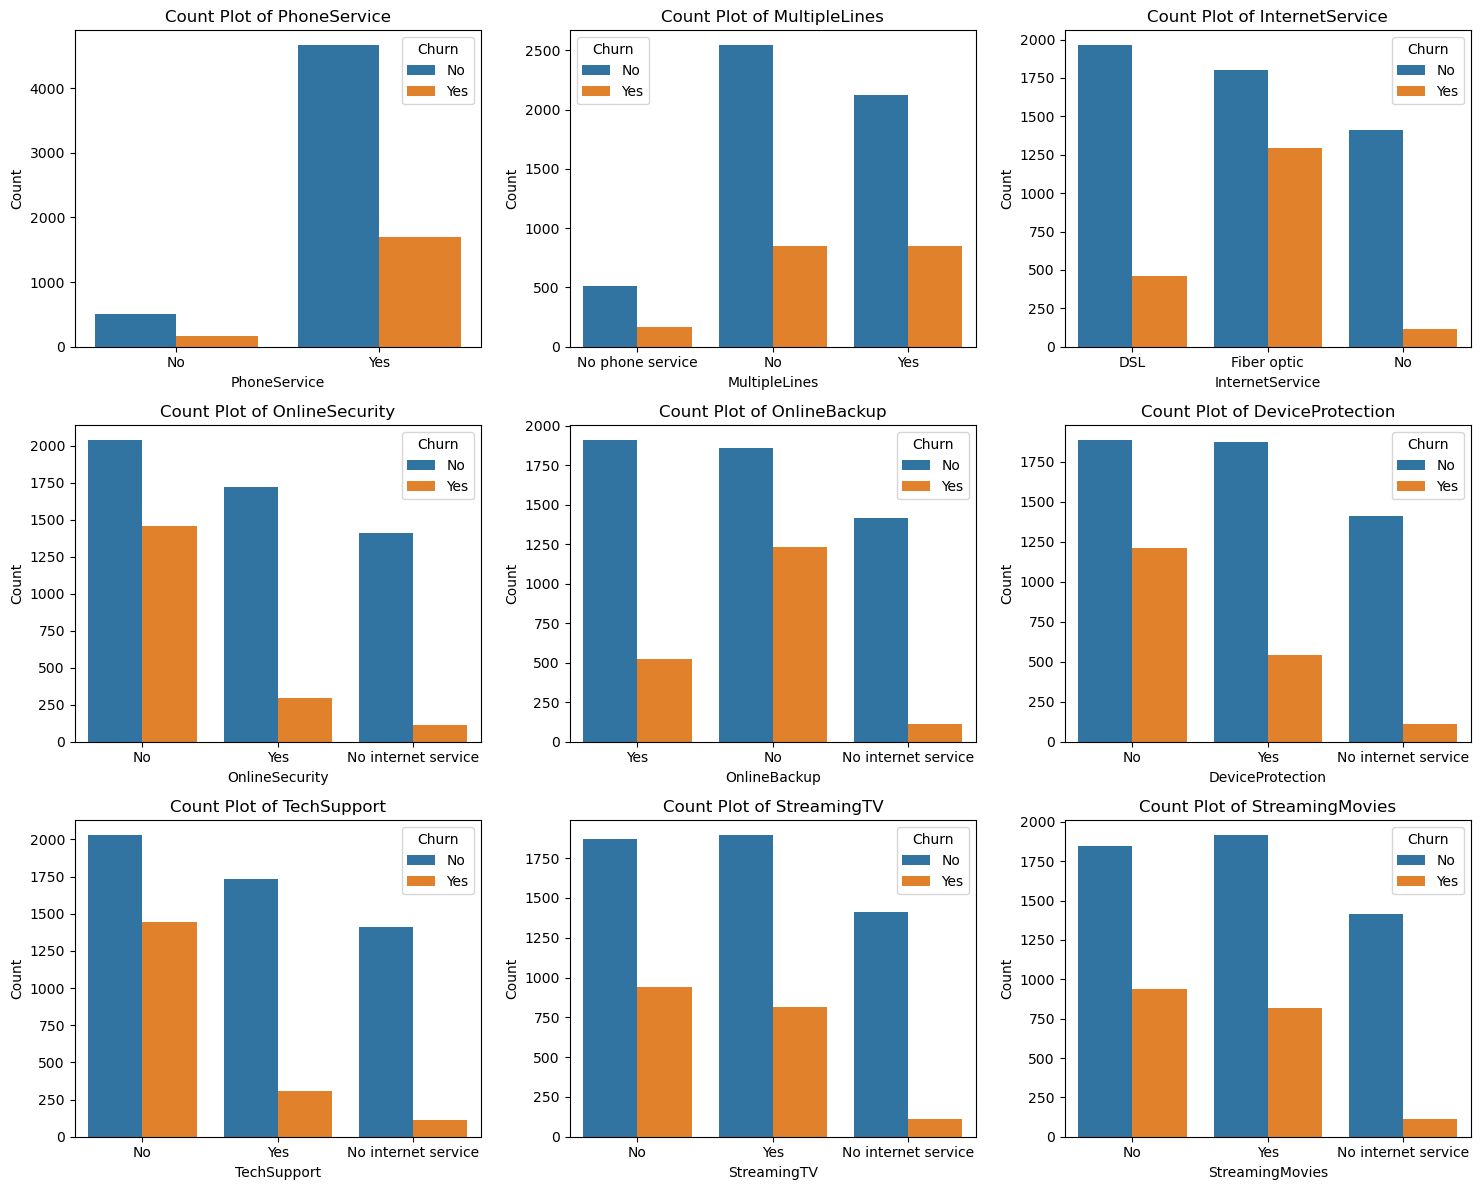

In [75]:
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns for the subplot grid (you can change this)
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))  # Adjust figsize as needed

# Flatten the axes array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over columns and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x=col, data=data, ax=axes[i], hue = data["Churn"])
    axes[i].set_title(f'Count Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
    
plt.tight_layout()
plt.show()

# The majority of customers who do not churn tend to have services 
# like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. 
# For services like OnlineBackup, TechSupport, and StreamingTV, 
# churn rates are noticeably higher when these services are not used or are unavailable.

In [77]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

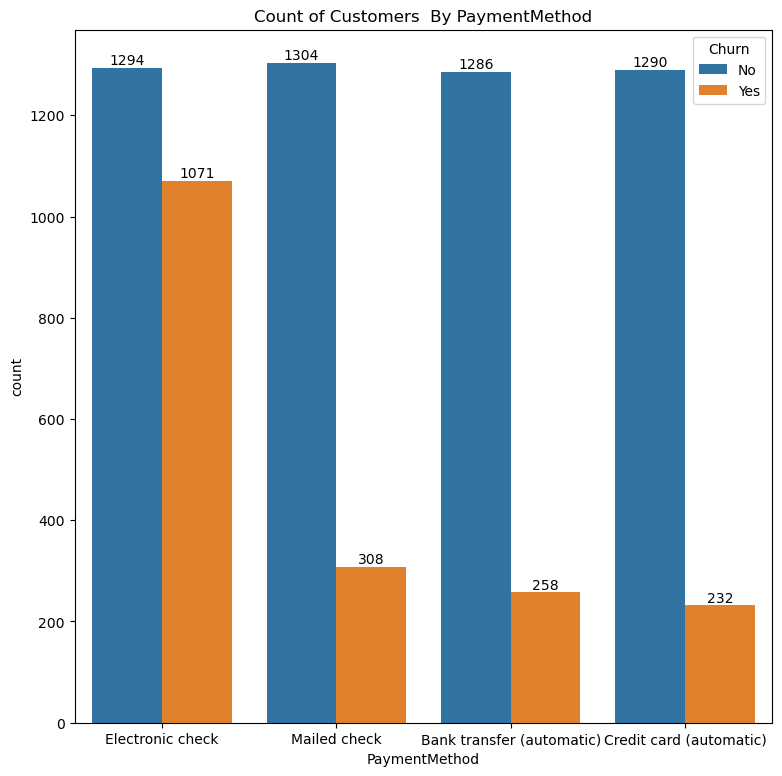

In [78]:
plt.figure(figsize=(9,9))
ax=sns.countplot(x=data['PaymentMethod'],data=data,hue="Churn")
plt.title('Count of Customers  By PaymentMethod')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# customer is likely to churn out when he is using electronic check as a payment method.

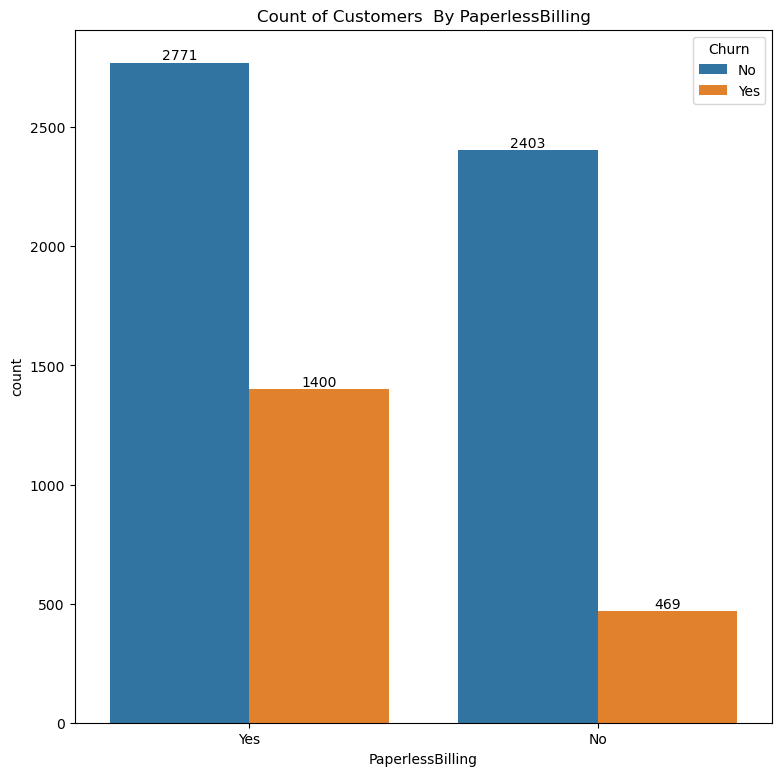

In [82]:
plt.figure(figsize=(9,9))
ax=sns.countplot(x=data['PaperlessBilling'],data=data,hue="Churn")
plt.title('Count of Customers  By PaperlessBilling')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# customer is likely to churn out when he is using paperless billing.

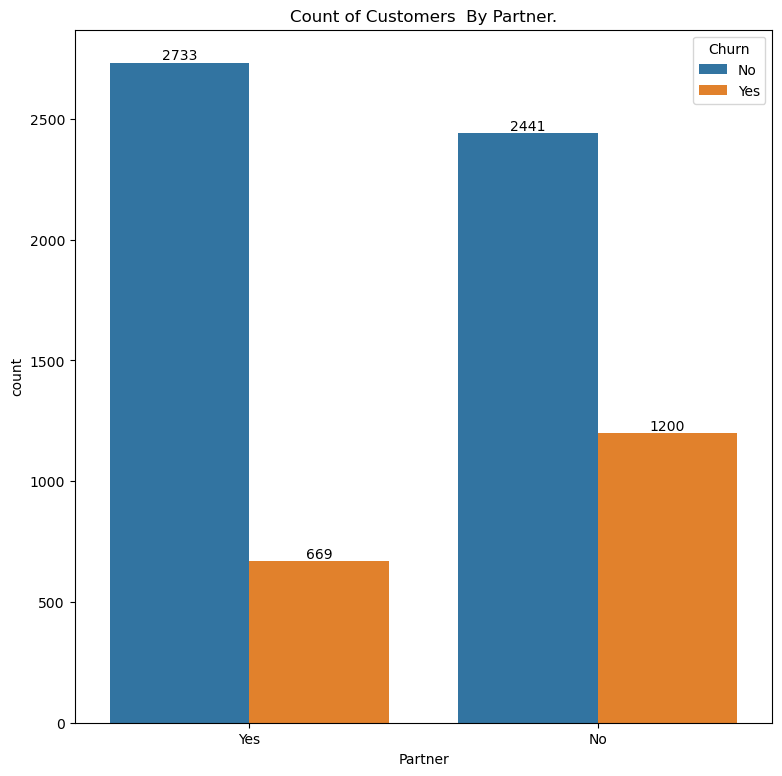

In [85]:
plt.figure(figsize=(9,9))
ax=sns.countplot(x=data['Partner'],data=data,hue="Churn")
plt.title('Count of Customers  By Partner.')
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

# customer is likely to churn out when he is not partner in the company